In [1]:
import matplotlib.pyplot as plt

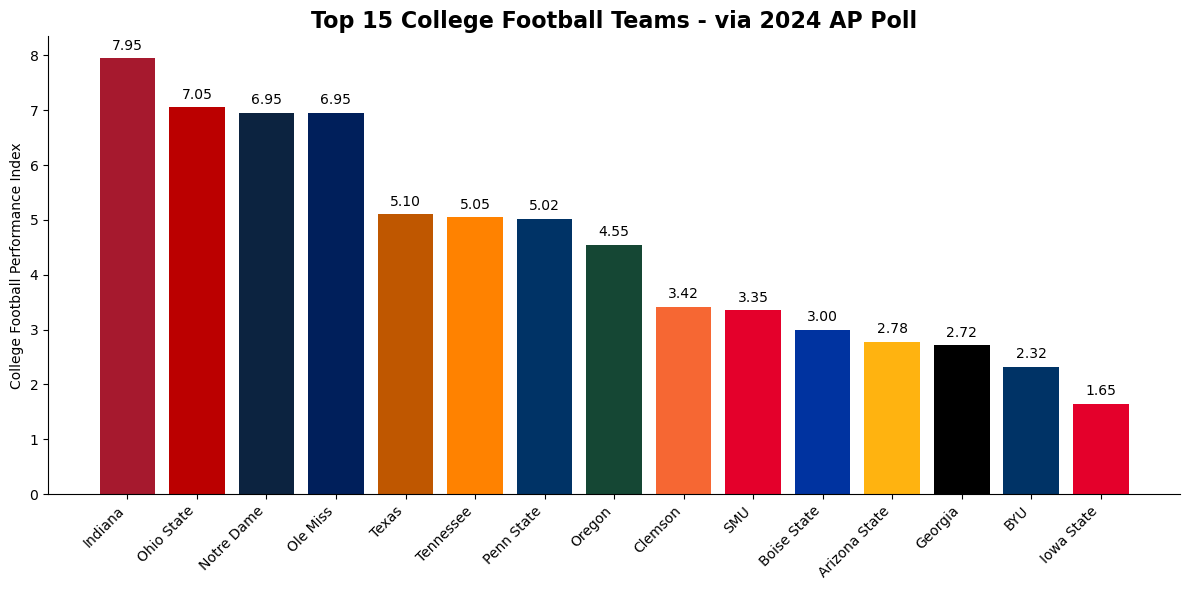

In [7]:
cfb_teams = ['Indiana', 'Ohio State', 'Notre Dame', 'Ole Miss', 'Texas',
             'Tennessee', 'Penn State', 'Oregon', 'Clemson', 'SMU',
             'Boise State', 'Arizona State', 'Georgia', 'BYU', 'Iowa State']

cpi_scores = [7.95, 7.05, 6.95, 6.95, 5.1,
            5.05, 5.02, 4.55, 3.42, 3.35,
            3.0, 2.78, 2.72, 2.32, 1.65]

team_colors = [
    "#a6192e", "#bb0000", "#0C2340", "#001F5B", "#bf5700",
    "#ff8200", "#003366", "#154734", "#f66733", "#e4002b",
    "#0033a0", "#ffb310", "#000000", "#003366", "#E4002B"
]

# Create the bar chart
plt.figure(figsize=(12,6))
bars = plt.bar(cfb_teams, cpi_scores, color=team_colors)

# Bold the title
plt.title("Top 15 College Football Teams - via 2024 AP Poll", fontweight='bold', fontsize=16)

# Add labels
plt.ylabel("College Football Performance Index")
plt.xticks(rotation=45, ha='right')

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar, cpi in zip(bars, cpi_scores):
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X position: center of bar
        bar.get_height() + 0.1,           # Y position: slightly above bar
        f"{cpi:.2f}",                     # Display CPI to 2 decimals
        ha='center', va='bottom', fontsize=10
    )

# Show the chart
plt.tight_layout()
plt.show()

In [14]:
import plotly.express as px
import pandas as pd

# Example Big Ten recruiting data
data = {
    'School': [
        'Indiana', 'Purdue', 'Ohio State', 'Penn State', 'Michigan',
        'Michigan State', 'Illinois', 'Northwestern', 'Iowa', 'Minnesota',
        'Wisconsin', 'Nebraska', 'Oregon', 'Maryland', 'Rutgers',
        'Washington', 'USC', 'UCLA'
    ],
    'State': [
        'IN', 'IN', 'OH', 'PA', 'MI',
        'MI', 'IL', 'IL', 'IA', 'MN',
        'WI', 'NE', 'OR', 'MD', 'NJ',
        'WA', 'CA', 'CA'
    ],
    'Recruits': [
        17, 27, 22, 26, 26,
        21, 20, 17, 21, 21,
        22, 33, 27, 24, 25,
        18, 25, 11
    ]
}

df = pd.DataFrame(data)

# Step 1: Combine totals per state (so color = total recruits per state)
state_totals = df.groupby('State', as_index=False)['Recruits'].sum()

# Step 2: Create hover text showing all schools + recruit counts per state
hover_df = (
    df.groupby('State')
    .apply(lambda x: '<br>'.join(f"{row['School']}: {row['Recruits']}" for _, row in x.iterrows()))
    .reset_index(name='HoverText')
)

# Step 3: Merge totals + hover data
merged = pd.merge(state_totals, hover_df, on='State')

# Step 4: Build choropleth map
fig = px.choropleth(
    merged,
    locations='State',
    locationmode='USA-states',
    color='Recruits',
    hover_name='State',
    color_continuous_scale='Reds',
    scope='usa',
    title='Big Ten Recruiting by State — Class of 2024',
)

# Step 5: Customize hover info and appearance
fig.update_traces(
    hovertemplate='<b>%{location}</b><br>%{customdata[0]}<extra></extra>',
    customdata=merged[['HoverText']]
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    title_font=dict(size=18, family='Arial Black'),
    coloraxis_colorbar=dict(title='Total Recruits'),
)

fig.show()


/var/folders/wl/mr0t_6yx7bd85zhwy66s84hh0000gn/T/ipykernel_22071/2245469053.py:34: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [27]:
import plotly.express as px
import pandas as pd

# Your 2024 season data
data = {
    'Team': [
        'Indiana', 'Ohio State', 'Notre Dame', 'Ole Miss', 'Texas',
        'Tennessee', 'Penn State', 'Oregon', 'Clemson', 'SMU',
        'Boise State', 'Arizona State', 'Georgia', 'BYU', 'Iowa State'
    ],
    'Points_For': [
        537, 571, 578, 502, 528,
        464, 530, 488, 486, 511,
        522, 461, 441, 405, 435
    ],
    'Points_Against': [
        203, 206, 248, 187, 245,
        209, 264, 272, 328, 309,
        316, 316, 288, 255, 321
    ],
    'Wins': [
        11, 14, 14, 10, 13,
        10, 13, 13, 10, 11,
        12, 11, 11, 11, 11
    ]
}

df = pd.DataFrame(data)

# Create scatterplot: size = wins, single color
fig = px.scatter(
    df,
    x='Points_For',
    y='Points_Against',
    size='Wins',
    hover_name='Team',
    color_discrete_sequence=['#1f77b4'],
    title='Offense vs Defense — Top 15 Teams (2024 Season)',
)

# Reverse y-axis so better defense is higher
fig.update_yaxes(autorange='reversed')

# Add labels next to each point with slight offset
for i, row in df.iterrows():
    fig.add_annotation(
        x=row['Points_For'] + 4,   # slight horizontal offset
        y=row['Points_Against'] - 1,  # slight vertical offset
        text=row['Team'],
        showarrow=False,
        font=dict(size=10, color='black'),
        xanchor='left',
        yanchor='middle'
    )

# Customize layout
fig.update_layout(
    xaxis_title='Points For (Offense)',
    yaxis_title='Points Against (Defense)',
    title_font=dict(size=20, family='Arial Black'),
    plot_bgcolor='rgba(0,0,0,0)',
)

fig.update_layout(
    width=800,   # narrower width
    height=600   # keep a decent height
)


fig.show()
